In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
#import utils.py
import utils as ut

In [17]:
filepath = 'lumber_delivery_preprocessed.csv' # Make sure this path is correct
df = ut.load_and_prep_data(filepath)

Data loaded successfully from lumber_delivery_preprocessed.csv
DataFrame shape: (763, 30)
Date range: 2022-01-03 00:00:00 to 2025-03-17 00:00:00
Columns: ['EXPECTED TYPE A TRUCKS', 'ACTUAL TYPE A TRUCKS', 'OUTSIDE EXTRA TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS', 'ACTUAL TYPE B TRUCKS', 'EXPECTED TYPE C TRUCKS', 'ACTUAL TYPE C TRUCKS', 'LARGE DELIVERIES (LBS)', 'SMALL DELIVERIES (LBS)', 'LARGE DELIVERIES (QTY)', 'SMALL DELIVERIES (QTY)', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'DFF', 'GASREGW', 'WPU081', 'Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Type_C_Truck_Accuracy', 'Average_Delivery_Size', 'Trend_Reschedule_Rate', 'Seasonal_Reschedule_Rate', 'Residual_Reschedule_Rate', 'Trend_Truck_Utilization', 'Seasonal_Truck_Utilization', 'Residual_Truck_Utilization']

Missing values per column:
EXPECTED TYPE A TRUCKS                0
ACTUAL TYPE A TRUCKS            

In [18]:
# Summary statistics, there's 30 columns and we want to show every column's summary
print("Summary Statistics:")
print(df.describe().T)

Summary Statistics:
                                   count          mean           std  \
EXPECTED TYPE A TRUCKS             763.0  3.026737e+01  5.472846e+00   
ACTUAL TYPE A TRUCKS               763.0  2.478244e+01  4.726077e+00   
OUTSIDE EXTRA TYPE A TRUCKS        763.0  4.352556e+00  4.888006e+00   
EXPECTED TYPE B FORK TRUCKS        763.0  9.876802e+00  1.365309e+00   
ACTUAL TYPE B TRUCKS               763.0  7.883355e+00  1.590910e+00   
EXPECTED TYPE C TRUCKS             763.0  4.899083e+00  4.721263e+00   
ACTUAL TYPE C TRUCKS               763.0  4.667104e+00  4.846115e+00   
LARGE DELIVERIES (LBS)             763.0  1.351559e+07  4.764397e+06   
SMALL DELIVERIES (LBS)             763.0  9.749586e+05  3.514482e+05   
LARGE DELIVERIES (QTY)             763.0  3.603670e+02  1.068162e+02   
SMALL DELIVERIES (QTY)             763.0  2.850917e+02  9.319151e+01   
RESCHEDULES (QTY)                  763.0  5.351245e+00  2.332546e+00   
RESCHEDULES (LBS)                  763.0  9.

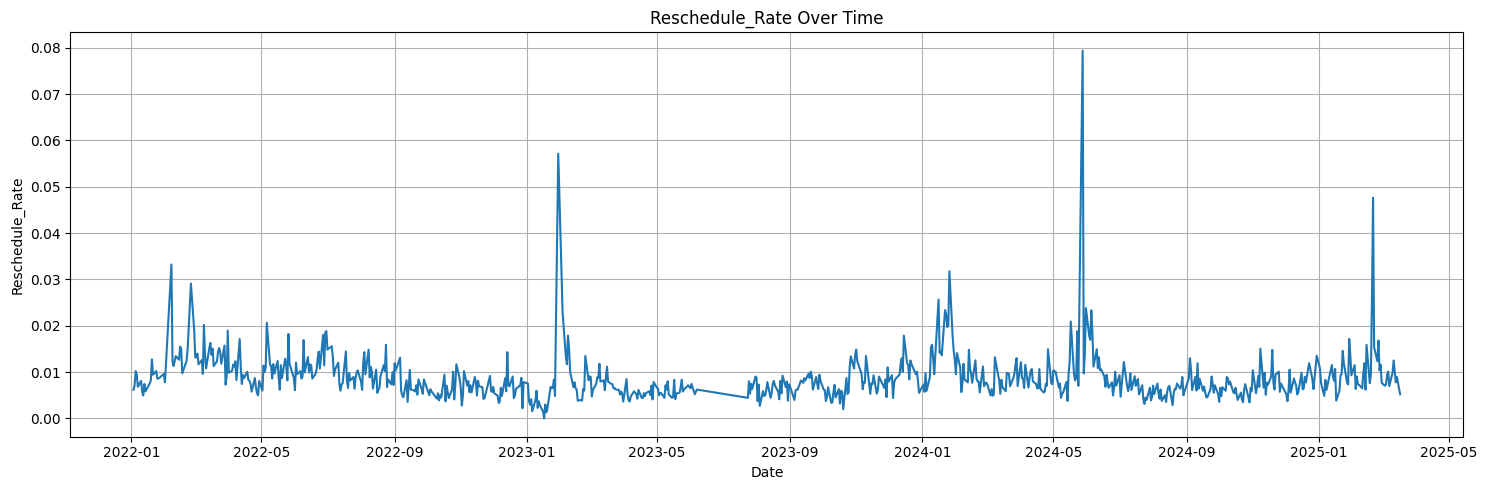

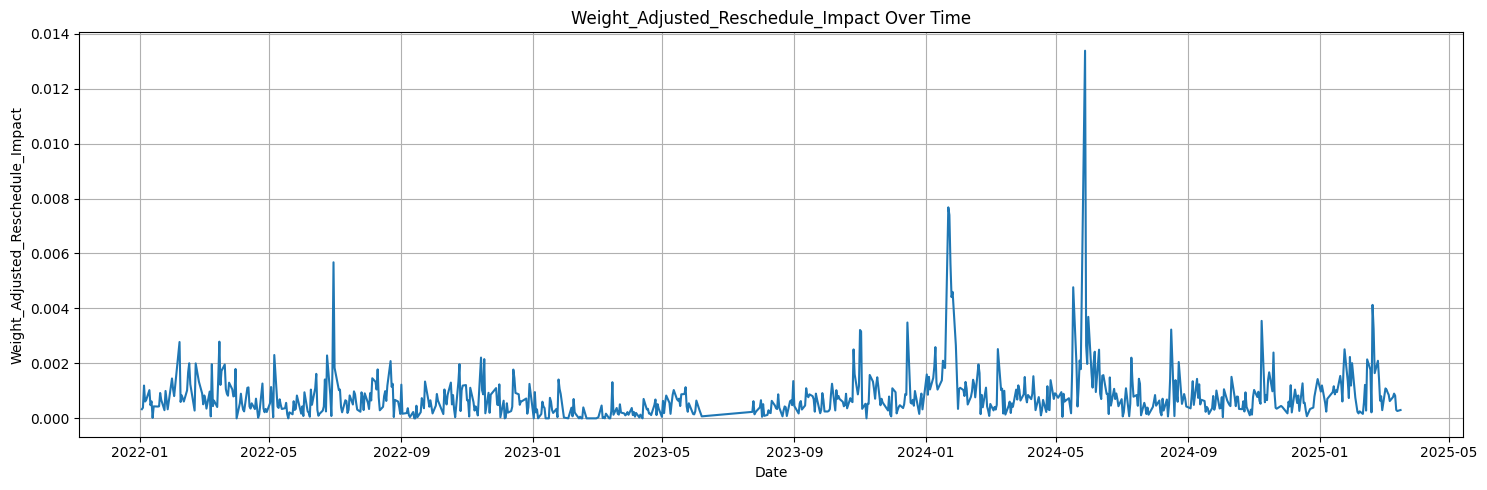

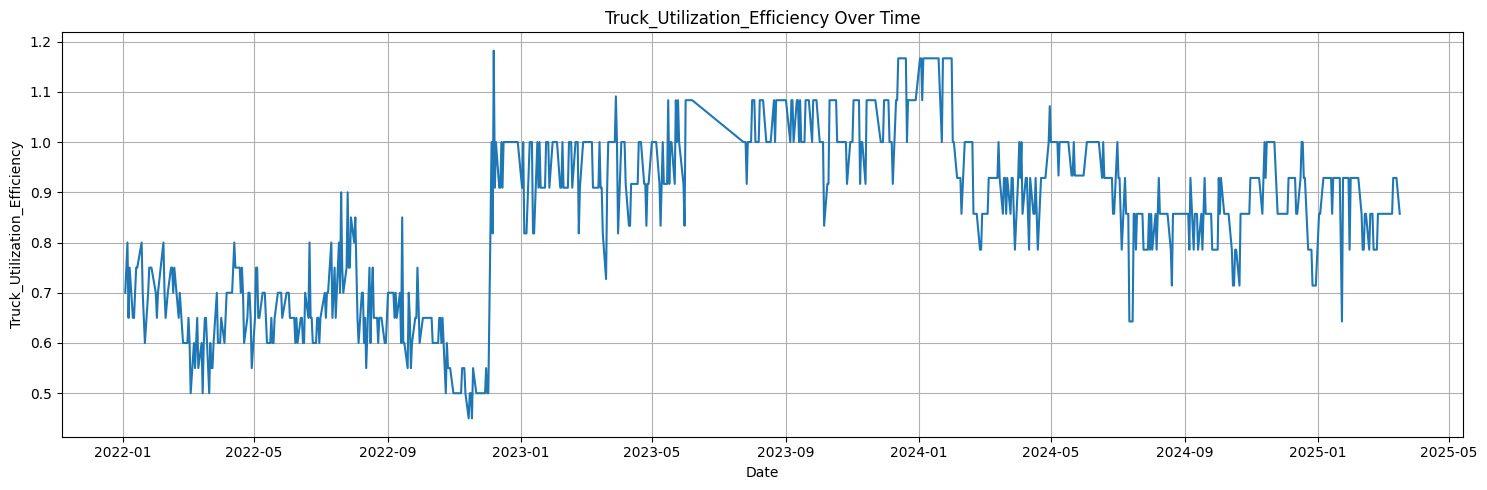

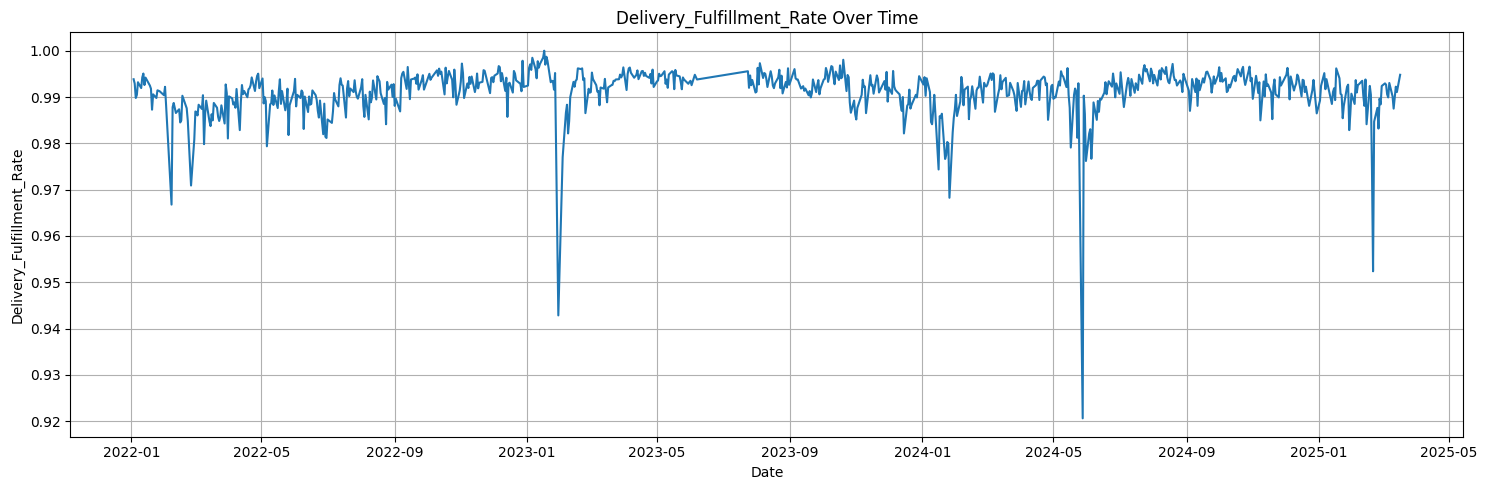

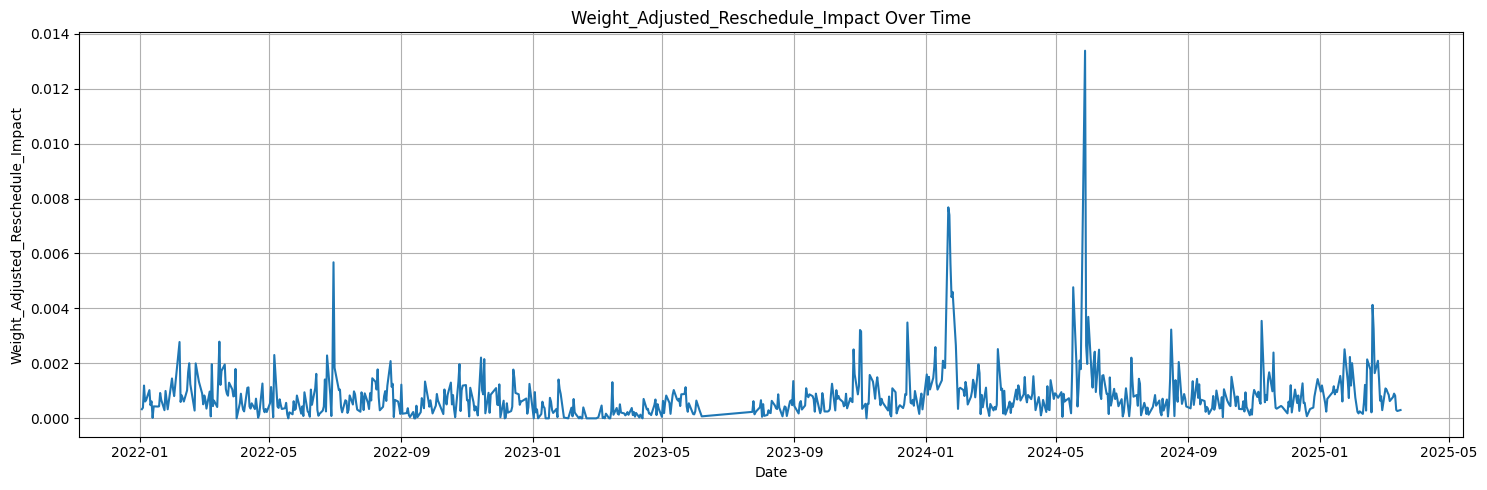

In [19]:
column_names = ['Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact']
for column in column_names:
    ut.plot_time_series(df, column_name=column, title=f'{column} Over Time', xlabel='Date', ylabel=column)

Seems like dependent variables are stable, visually looks like homoskedasticity, no need for log transforming for now.

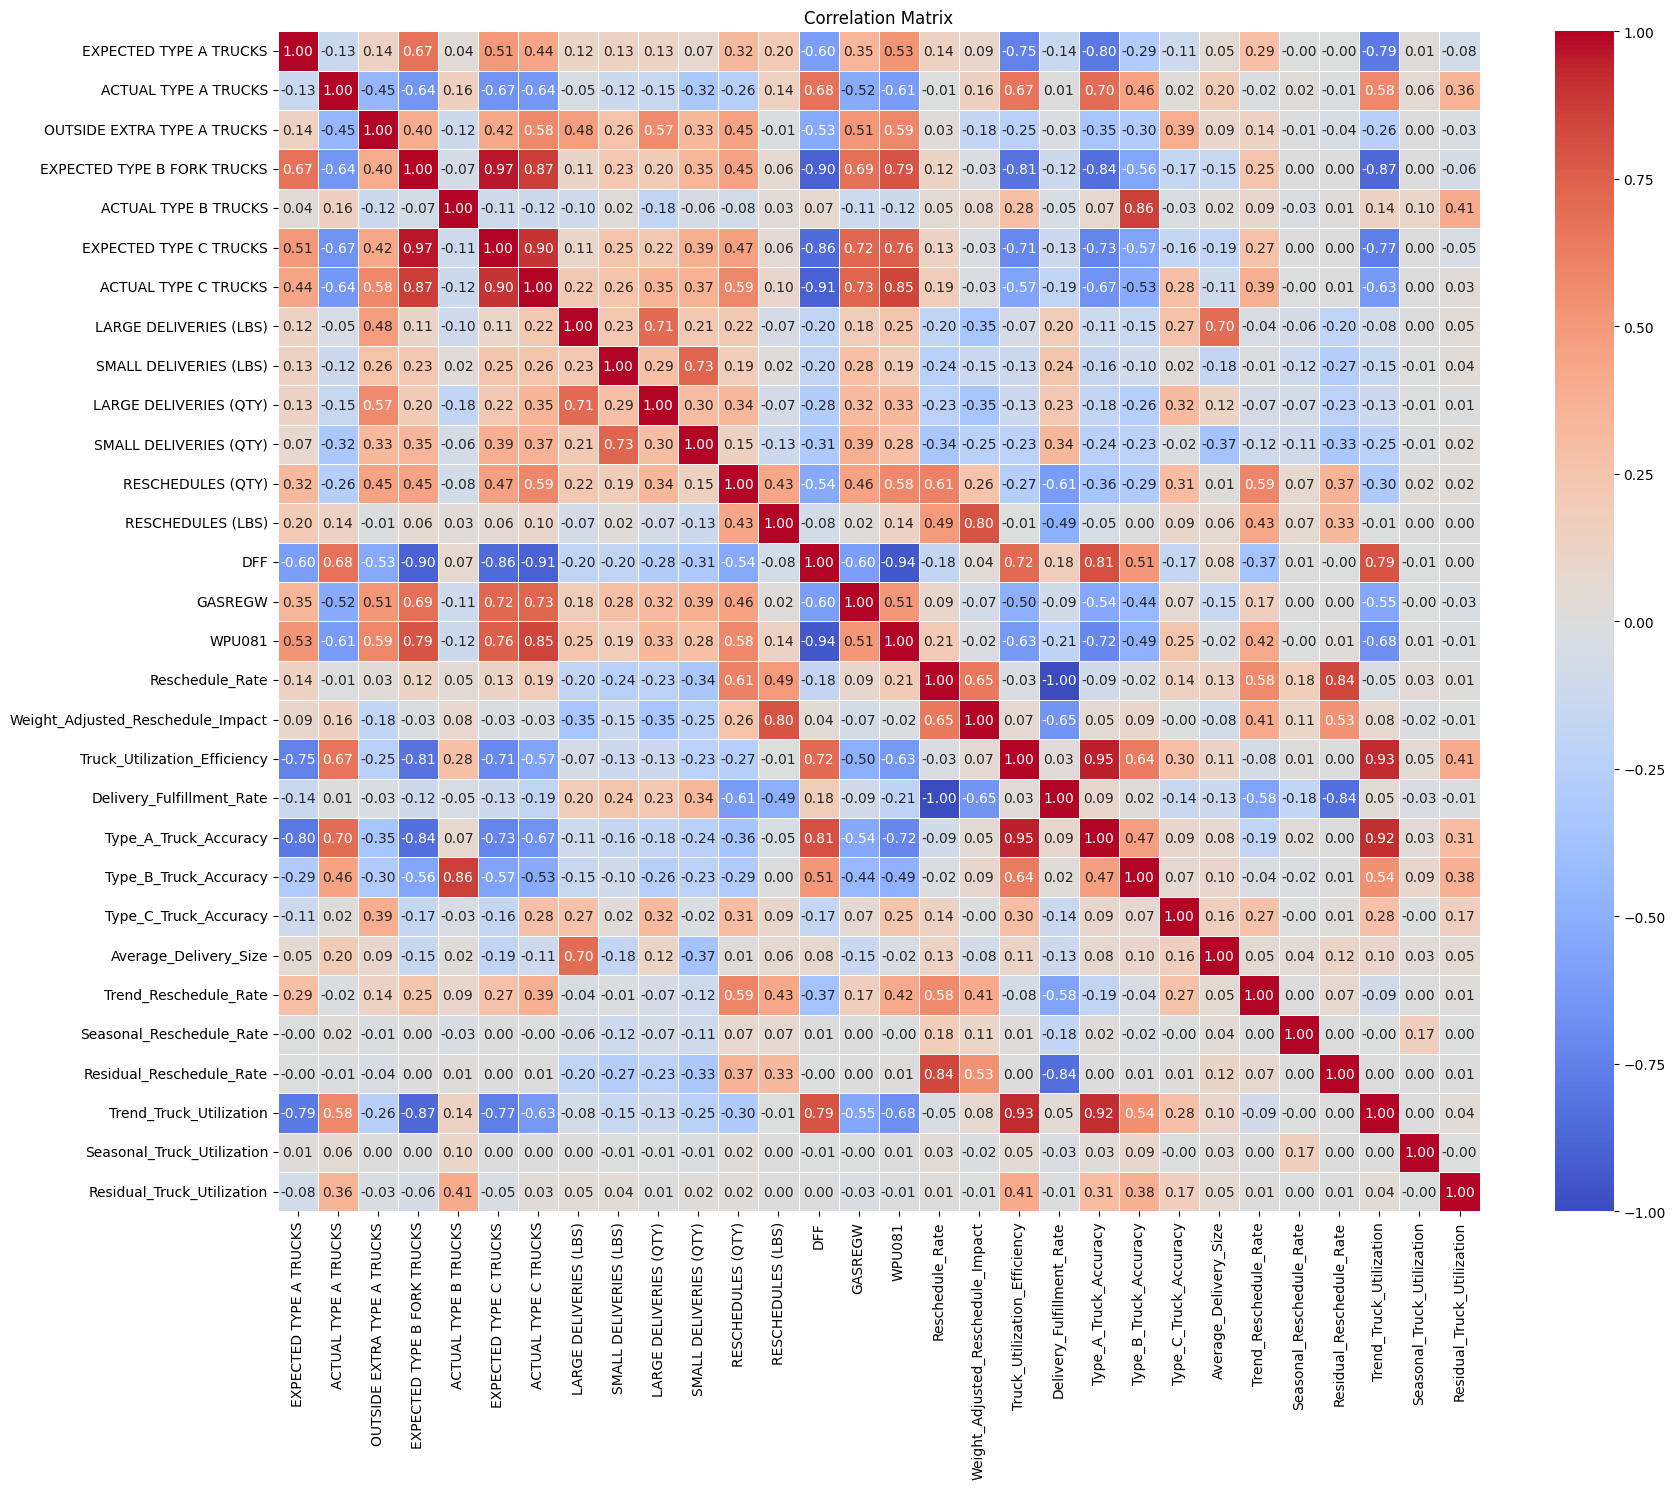

In [20]:
ut.plot_correlation_heatmap(df, method = 'pearson', columns=None, title='Correlation Matrix', figsize=(18, 15))

Let's move on to outlier detection

In [21]:
series_names = ['Reschedule_Rate', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'EXPECTED TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS', 'EXPECTED TYPE C TRUCKS', 'ACTUAL TYPE A TRUCKS', 'ACTUAL TYPE B TRUCKS', 'ACTUAL TYPE C TRUCKS', 'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Type_C_Truck_Accuracy', 'LARGE DELIVERIES (QTY)', 'SMALL DELIVERIES (QTY)', 'LARGE DELIVERIES (LBS)', 'SMALL DELIVERIES (LBS)', 'WPU081', 'GASREGW', 'DFF']

for series in series_names:
    ut.identify_outliers_iqr(df[series], series_name = series, multiplier=1.5)

Identified 35 potential outliers for 'Reschedule_Rate' using IQR method (multiplier=1.5). Bounds: (-0.0004, 0.0165)
Identified 0 potential outliers for 'Truck_Utilization_Efficiency' using IQR method (multiplier=1.5). Bounds: (0.2857, 1.4286)
Identified 35 potential outliers for 'Delivery_Fulfillment_Rate' using IQR method (multiplier=1.5). Bounds: (0.9835, 1.0004)
Identified 40 potential outliers for 'Weight_Adjusted_Reschedule_Impact' using IQR method (multiplier=1.5). Bounds: (-0.0007, 0.0020)
Identified 15 potential outliers for 'RESCHEDULES (QTY)' using IQR method (multiplier=1.5). Bounds: (-0.5000, 11.5000)
Identified 22 potential outliers for 'RESCHEDULES (LBS)' using IQR method (multiplier=1.5). Bounds: (-9059.0000, 27113.0000)
Identified 0 potential outliers for 'EXPECTED TYPE A TRUCKS' using IQR method (multiplier=1.5). Bounds: (6.0000, 54.0000)
Identified 0 potential outliers for 'EXPECTED TYPE B FORK TRUCKS' using IQR method (multiplier=1.5). Bounds: (4.5000, 16.5000)
Ident

Identified 35 potential outliers for 'Reschedule_Rate' using IQR method (multiplier=1.5). Bounds: (-0.0004, 0.0165)


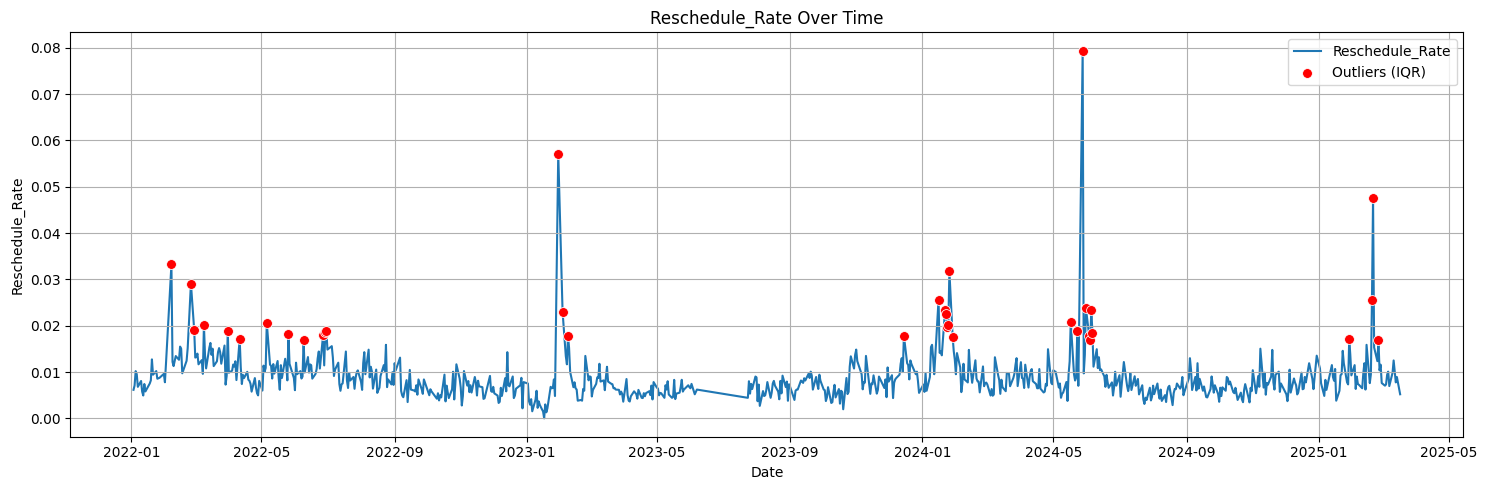

Identified 40 potential outliers for 'Weight_Adjusted_Reschedule_Impact' using IQR method (multiplier=1.5). Bounds: (-0.0007, 0.0020)


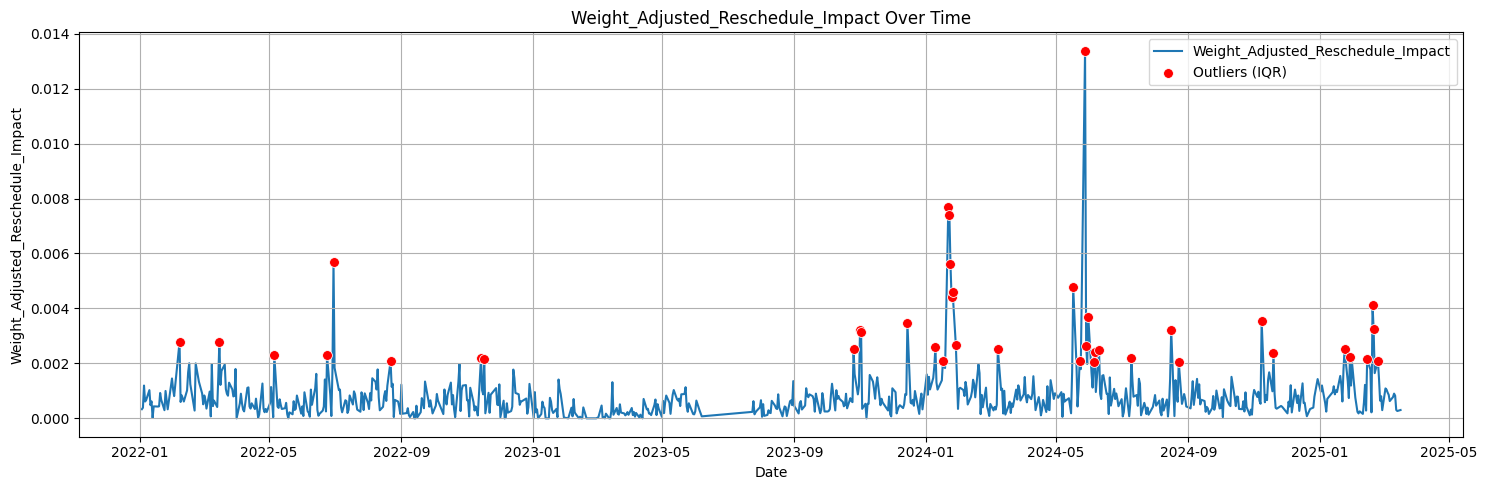

Identified 164 potential outliers for 'ACTUAL TYPE C TRUCKS' using IQR method (multiplier=1.5). Bounds: (-1.5000, 10.5000)


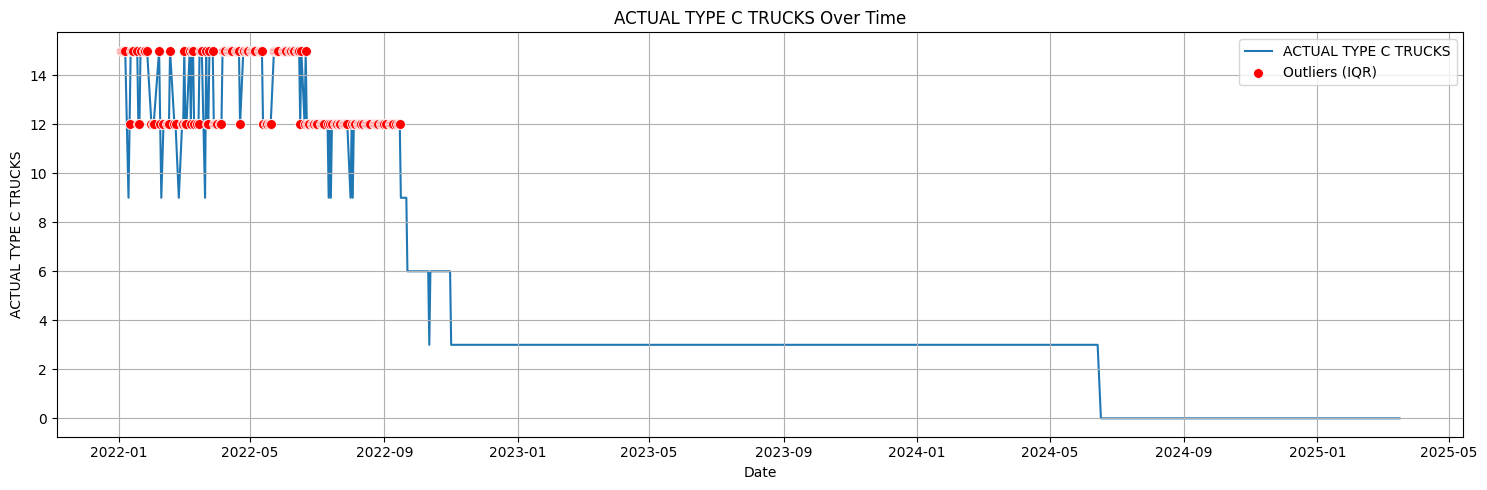

Identified 129 potential outliers for 'Type_C_Truck_Accuracy' using IQR method (multiplier=1.5). Bounds: (1.0000, 1.0000)


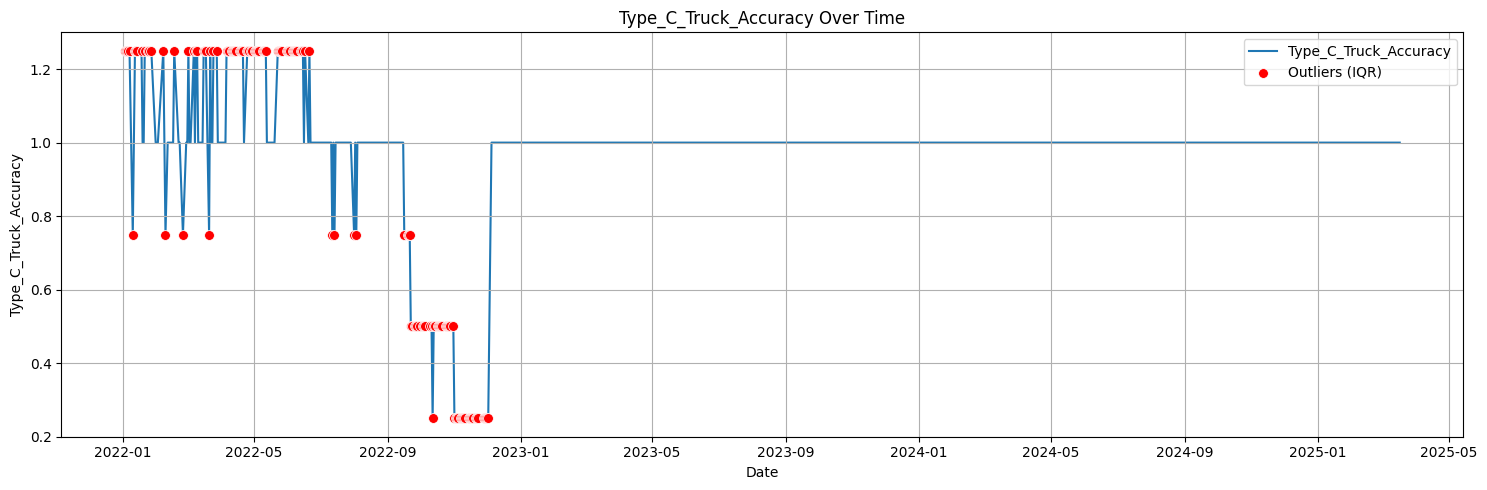

Identified 97 potential outliers for 'WPU081' using IQR method (multiplier=1.5). Bounds: (205.1370, 329.5850)


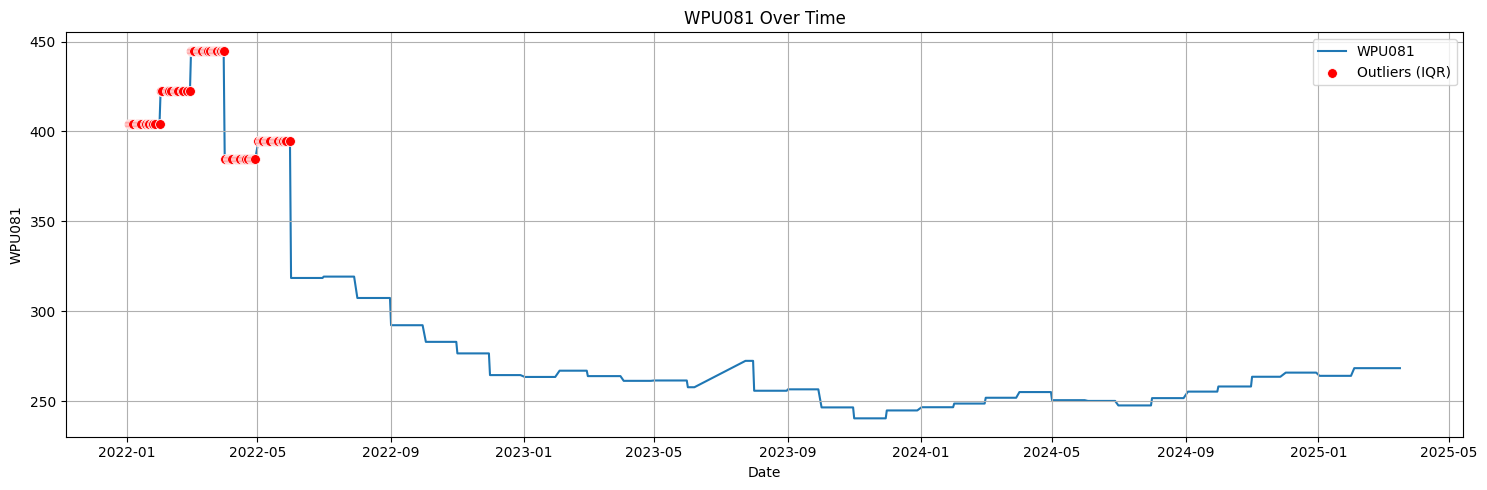

Identified 38 potential outliers for 'GASREGW' using IQR method (multiplier=1.5). Bounds: (2.4365, 4.5685)


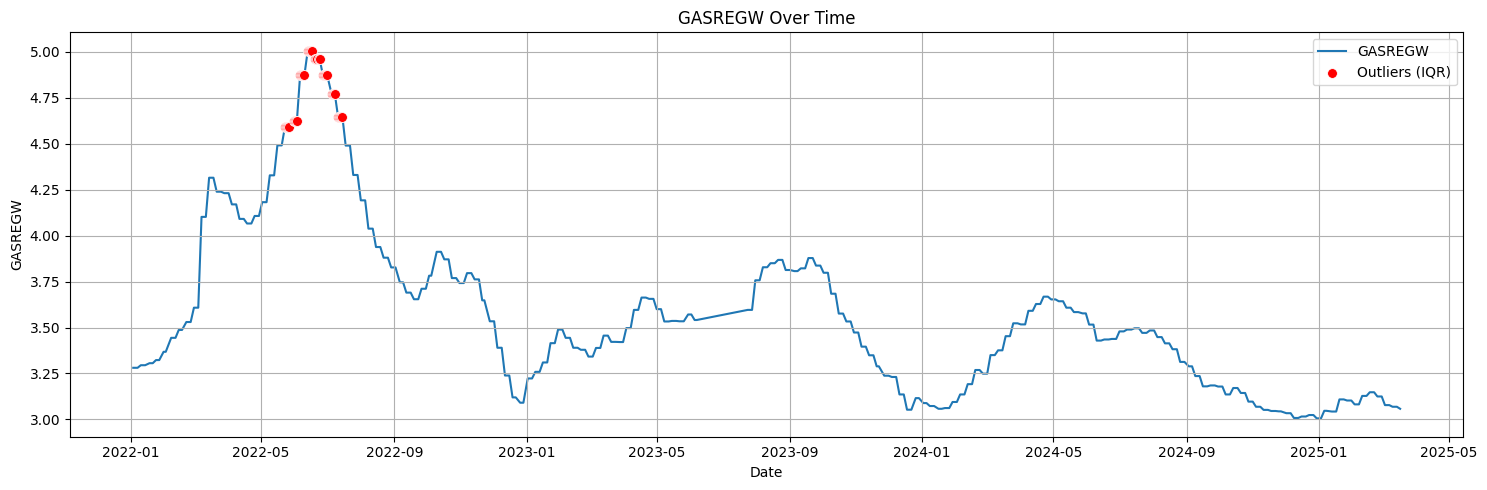

In [22]:
outlier_columns = ['Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'ACTUAL TYPE C TRUCKS', 'Type_C_Truck_Accuracy', 'WPU081', 'GASREGW']
for column in outlier_columns:
    ut.plot_series_with_outliers(df, column_name=column, title=f'{column} Over Time', xlabel='Date', ylabel=column)

So we decided to choose a few variables, and the results are quite interesting. Truck C's outliers, upon closer inspection on the dataframe itself, is just due to Truck C being phased out itself. Truck C needs to be on a close watch because it may not be reliable. 

As for reschedule impact, the metric itself is extremely low, indicating very low impact of rescheduling on the actual metric. This makes this metric not very worth looking at. Let's keep looking at rescheduling rate, because those reschedules could erode business trust and still be costly at the end of the day.

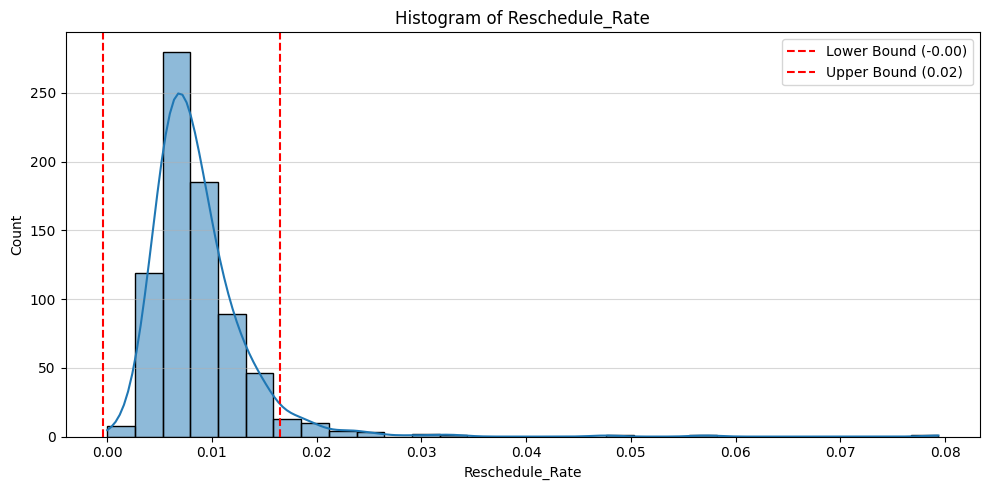

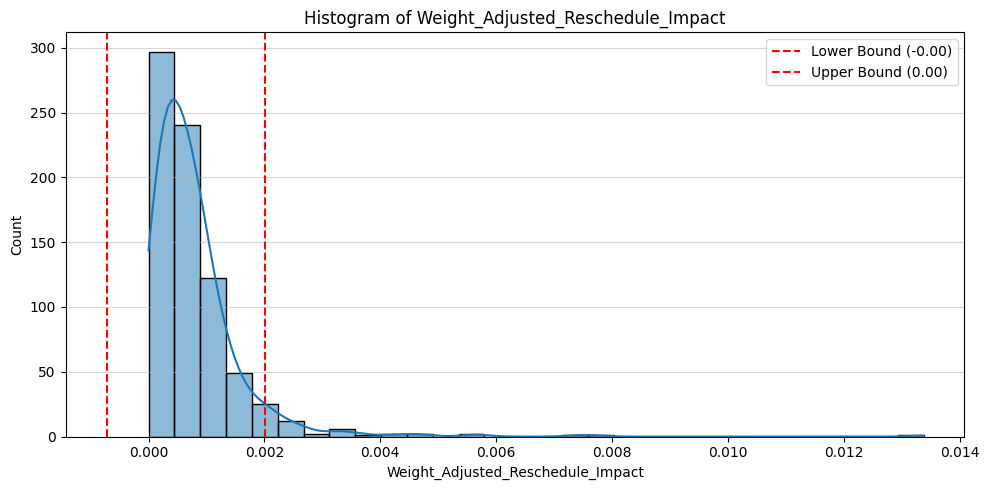

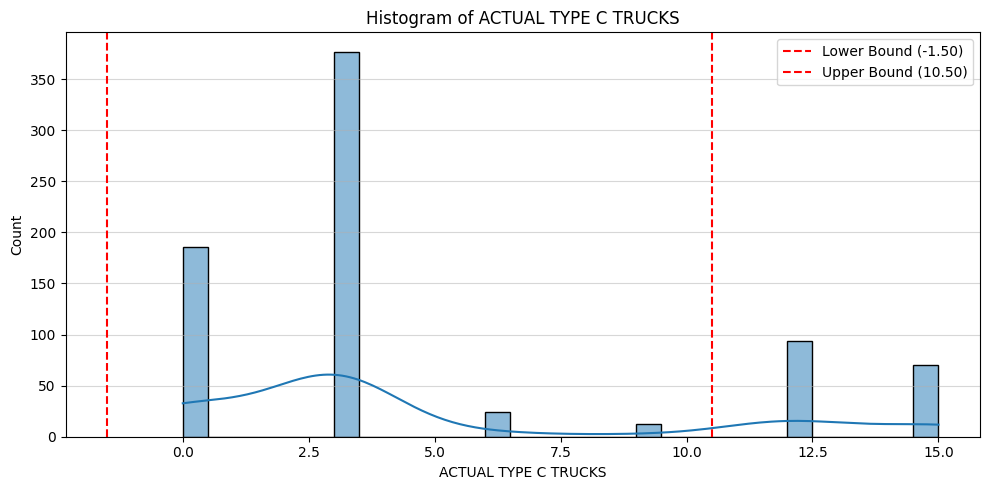

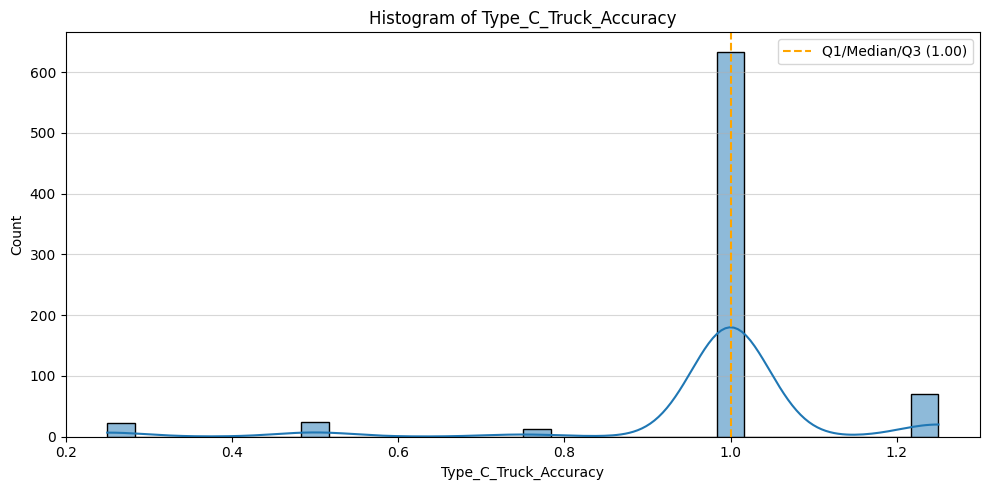

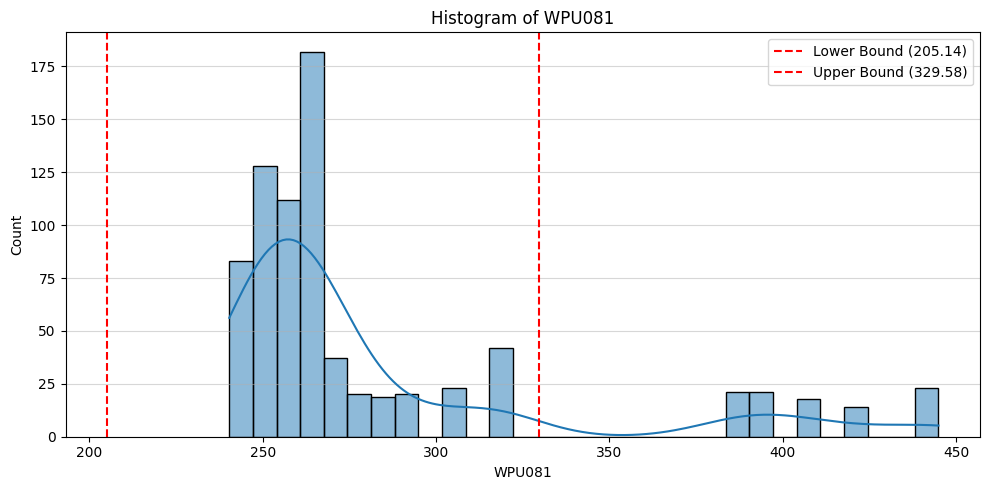

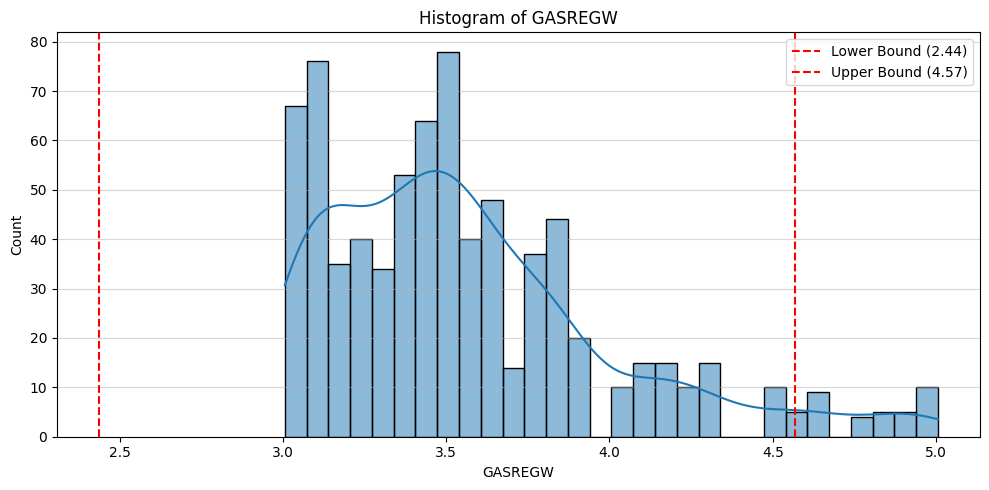

In [23]:
for col_name in outlier_columns: # Using 'col_name' for clarity
    ut.plot_histogram_with_outliers(df[col_name], series_name=col_name, multiplier=1.5, bins=30)

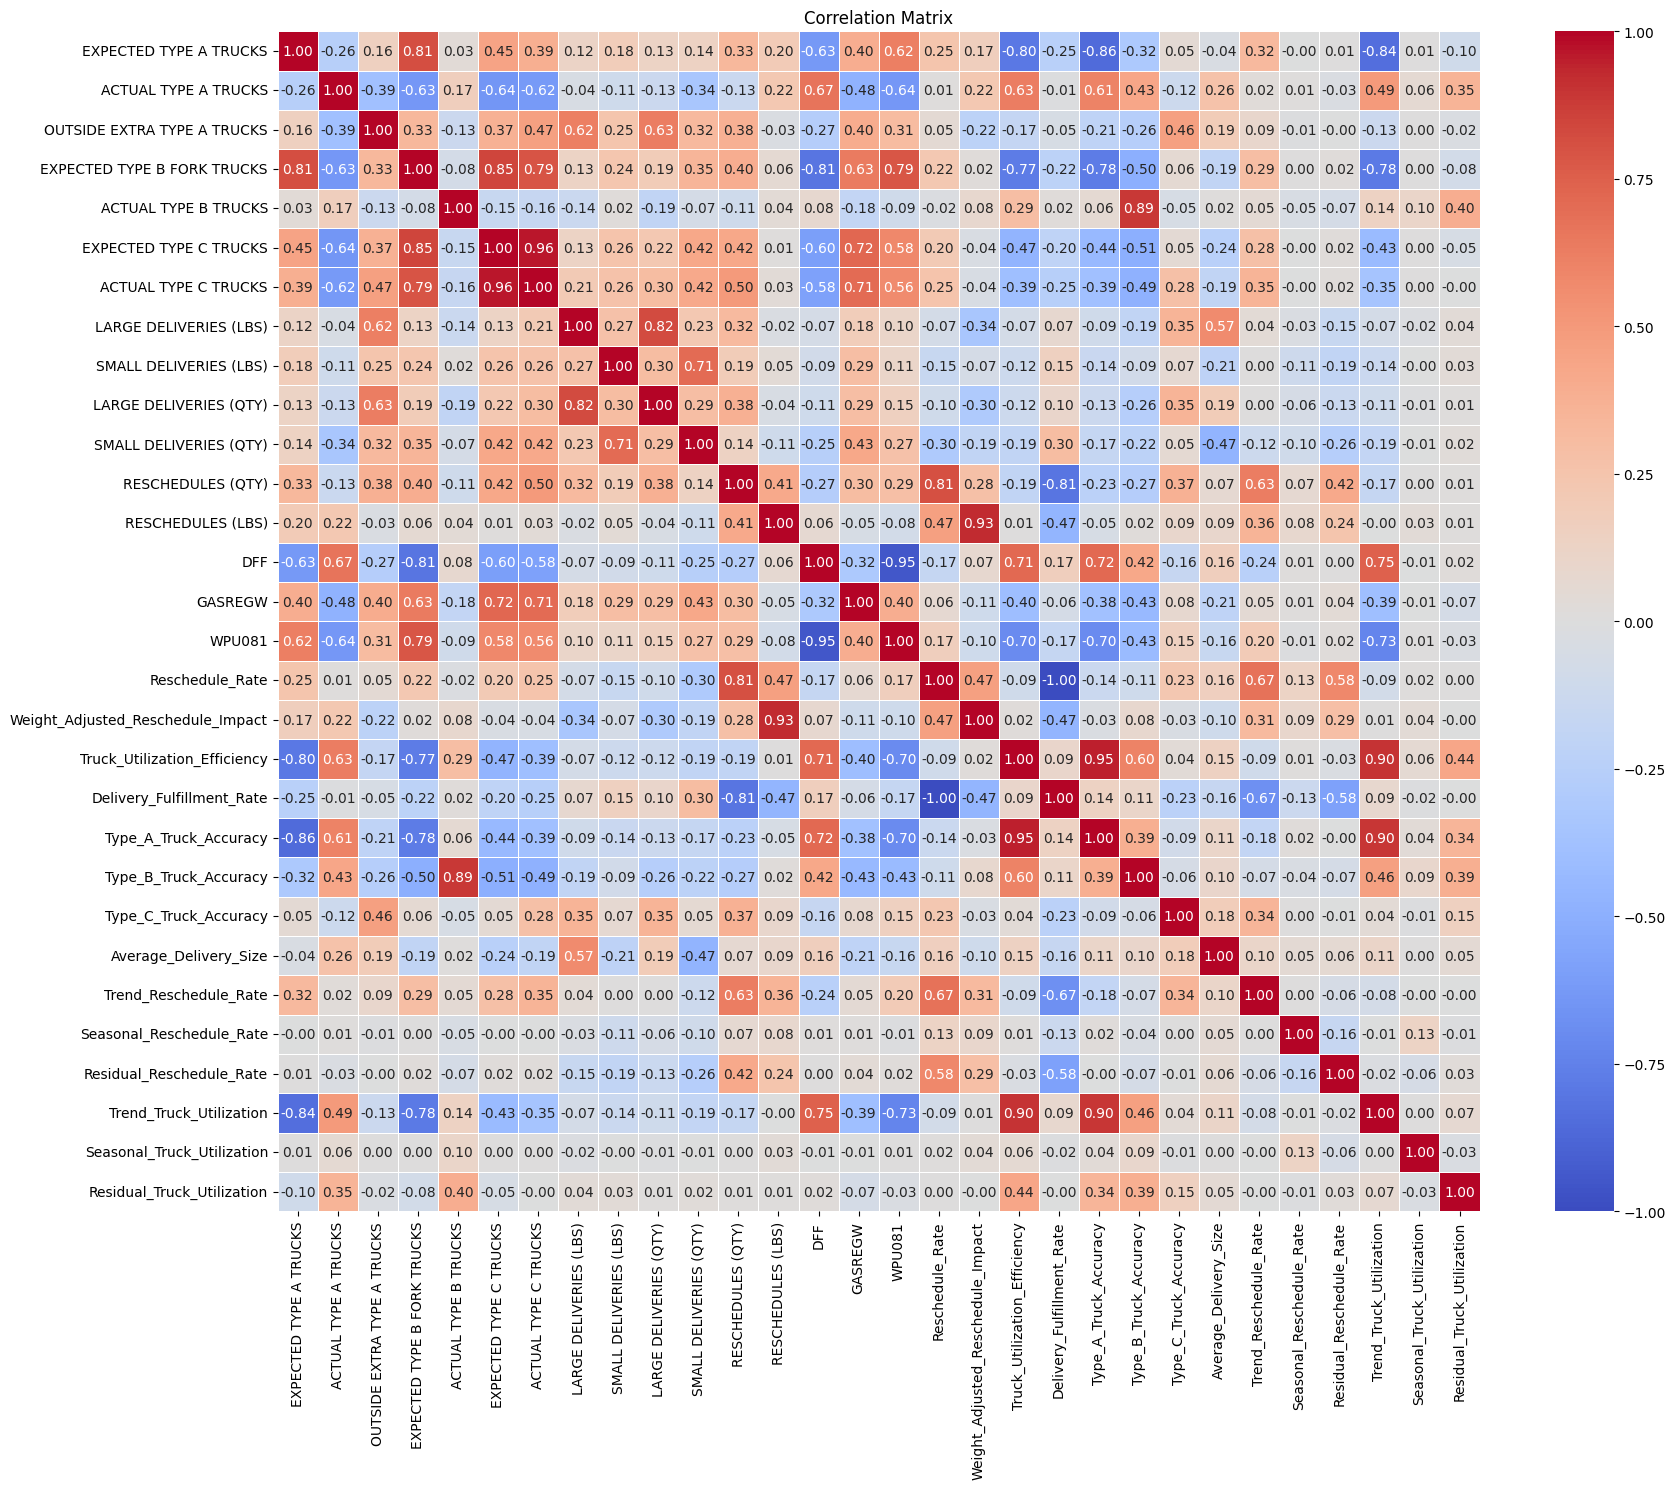

In [24]:
ut.plot_correlation_heatmap(df, method = 'spearman', columns=None, title='Correlation Matrix', figsize=(18, 15))

We know there's a lot of outliers and our data is a little weird. Here we try out spearman correlation, and we see that it's largely the same. Small deliveries are negatively correlated, meaning when there's more small deliveries, there tends to also be a lower reschedule rate. This would IMPLY that large deliveries are more prone to cancellations, but large deliveries are at -0.10, so it's a very very weak correlation. The more probable cause is that small deliveries reduce reschedule rate due to the amount of transactions being made and small deliveries having higher probability of going through.

We can consider a few predictors now(spearman):
Small Deliveries - -0.30
DFF - -0.17
WPU081 - 0.17
Actual Type C Trucks - 0.25
Trend Reschedule Rate - 0.67
Residual Reschedule Rate -0.58


Let's continue our EDA with stationarity analysis.

In [25]:
ut.run_stationarity_tests(df['Reschedule_Rate'], 'Reschedule_Rate')

--- Stationarity Tests for: Reschedule_Rate ---
ADF Test Results:
  ADF Statistic: -6.2136
  p-value: 0.0000
  Lags Used: 5
  Number of Observations: 757
  Critical Values:
	1%: -3.4390
	5%: -2.8654
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 0.2533
  p-value: 0.1000
  Lags Used: 15
  Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
  Conclusion: Likely Stationary around constant (fail to reject H0 at 5% level)
---------------------------------------



c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:246: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_c = kpss(series_clean, regression='c', nlags='auto')


Reschedule Rate is Stationary! Great.

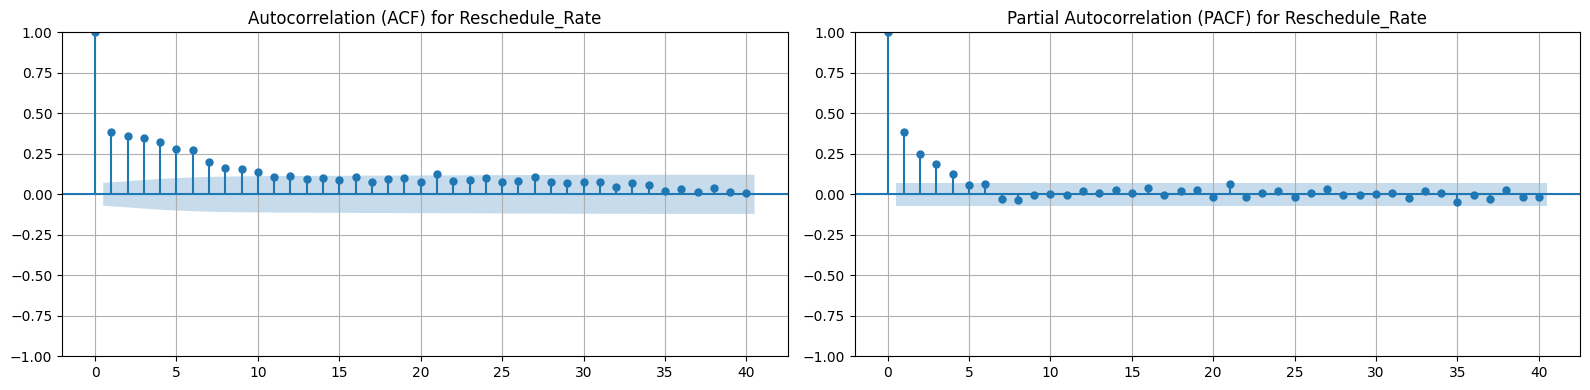

In [26]:
ut.plot_acf_pacf(df['Reschedule_Rate'], title_suffix='for Reschedule_Rate')

ACF (Left Plot)

Gradual Decay Pattern: The autocorrelation shows significant positive values that slowly decrease across multiple lags (roughly 10-12 periods)
This gradual decay suggests "memory." Reschedule rates in one period influence rates for several periods afterward

PACF (Right Plot)

Sharp Cutoff After Lag 4: There are significant spikes at lags 1-4, then values fall within the significance bands
This pattern is characteristic of an AR(4) process - the reschedule rate is directly influenced by its values from the previous 4 time periods, but not by earlier periods directly

Let's test stationarity on everything else now.

We can consider a few predictors now(spearman):
Small Deliveries - -0.30
DFF - -0.17
WPU081 - 0.17
Actual Type C Trucks - 0.25
Trend Reschedule Rate - 0.67
Residual Reschedule Rate -0.58

In [27]:
# Stationarity Test for the selected predictors
Predictors = ['SMALL DELIVERIES (QTY)', 'DFF', 'WPU081', 'ACTUAL TYPE C TRUCKS', 'Trend_Reschedule_Rate', 'Residual_Reschedule_Rate']
for col_name in Predictors:
    ut.run_stationarity_tests(df[col_name], col_name)

--- Stationarity Tests for: SMALL DELIVERIES (QTY) ---
ADF Test Results:
  ADF Statistic: -3.5920
  p-value: 0.0059
  Lags Used: 13
  Number of Observations: 749
  Critical Values:
	1%: -3.4391
	5%: -2.8654
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 2.9602
  p-value: 0.0100
  Lags Used: 14
  Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
  KPSS Statistic: 2.9602
  p-value: 0.0100
  Lags Used: 14
  Critical Values:
  Conclusion: Likely Non-Stationary around trend too (reject H0 at 5% level)
---------------------------------------

--- Stationarity Tests for: DFF ---
ADF Test Results:
  ADF Statistic: -2.8443
  p-value: 0.0522
  Lags Used: 0
  Number of Observations: 762
  Critical Values:
	1%: -3.4390
	5%: -2.8653
	10%: -2.5688
  Conclusion: Likely Non-Stationary (fail to reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 2

c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:246: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_c = kpss(series_clean, regression='c', nlags='auto')
c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:256: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_ct = kpss(series_clean, regression='ct', nlags='auto')
c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:246: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_c = kpss(series_clean, regression='c', nlags='auto')
c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:256: InterpolationWarning: The test statistic is outside 

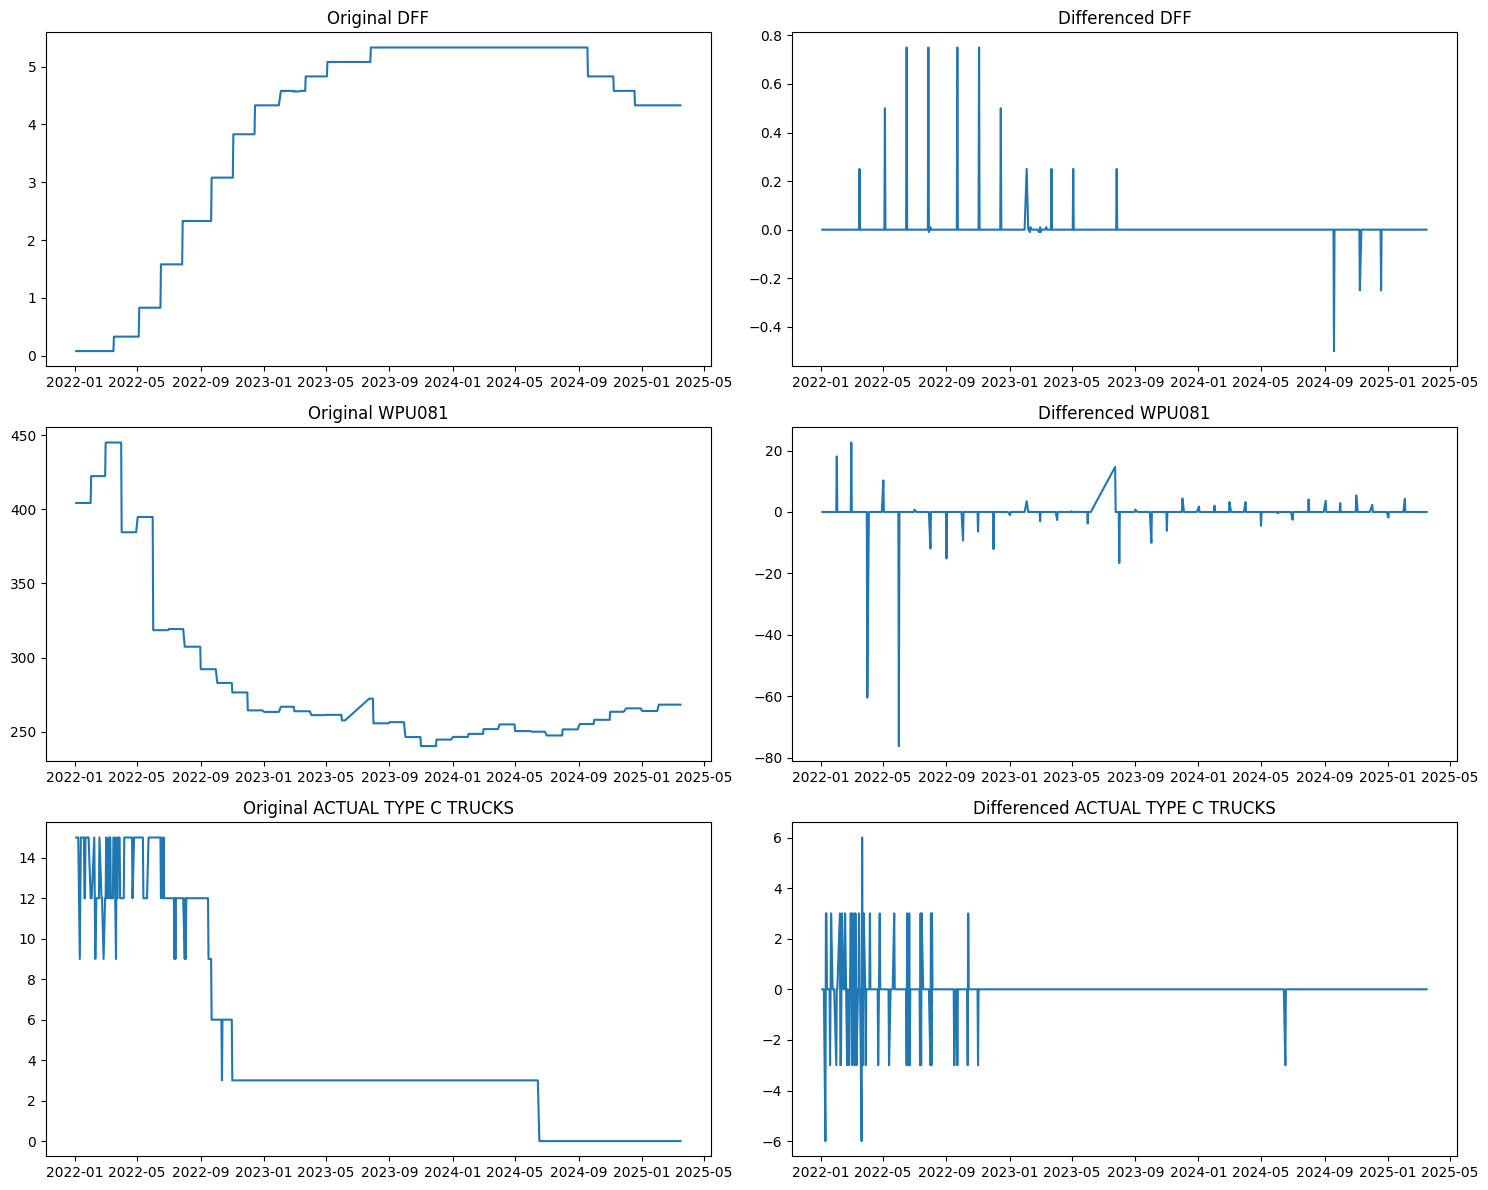

In [28]:
# Create differenced versions of the non-stationary variables
df['DFF_diff'] = df['DFF'].diff()
df['WPU081_diff'] = df['WPU081'].diff()
df['ACTUAL_TYPE_C_TRUCKS_diff'] = df['ACTUAL TYPE C TRUCKS'].diff()

# Create a figure with 3 rows, 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot original vs differenced series
axes[0, 0].plot(df['DFF'])
axes[0, 0].set_title('Original DFF')
axes[0, 1].plot(df_diff['DFF_diff'])
axes[0, 1].set_title('Differenced DFF')

axes[1, 0].plot(df['WPU081'])
axes[1, 0].set_title('Original WPU081')
axes[1, 1].plot(df_diff['WPU081_diff'])
axes[1, 1].set_title('Differenced WPU081')

axes[2, 0].plot(df['ACTUAL TYPE C TRUCKS'])
axes[2, 0].set_title('Original ACTUAL TYPE C TRUCKS')
axes[2, 1].plot(df_diff['ACTUAL_TYPE_C_TRUCKS_diff'])
axes[2, 1].set_title('Differenced ACTUAL TYPE C TRUCKS')

plt.tight_layout()
plt.show()

Now we can use these differenced variables in regression models, let's just double check for stationarity just to make sure.

In [29]:
Differenced_Col = ['DFF_diff', 'WPU081_diff', 'ACTUAL_TYPE_C_TRUCKS_diff']
for col_name in Differenced_Col:
    ut.run_stationarity_tests(df[col_name], col_name)

--- Stationarity Tests for: DFF_diff ---
ADF Test Results:
  ADF Statistic: -27.8056
  p-value: 0.0000
  Lags Used: 0
  Number of Observations: 761
  Critical Values:
	1%: -3.4390
	5%: -2.8653
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 1.3124
  p-value: 0.0100
  Lags Used: 2
  Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
  KPSS Statistic: 1.3124
  p-value: 0.0100
  Lags Used: 2
  Critical Values:
  Conclusion: Likely Non-Stationary around trend too (reject H0 at 5% level)
---------------------------------------

--- Stationarity Tests for: WPU081_diff ---
ADF Test Results:
  ADF Statistic: -27.6063
  p-value: 0.0000
  Lags Used: 0
  Number of Observations: 761
  Critical Values:
	1%: -3.4390
	5%: -2.8653
	10%: -2.5688
  Conclusion: Likely Stationary (reject H0 at 5% level)

---
KPSS Test Results (stationarity around constant):
  KPSS Statistic: 0.3548
  p-value: 0.

c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:246: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_c = kpss(series_clean, regression='c', nlags='auto')
c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:256: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_ct = kpss(series_clean, regression='ct', nlags='auto')
c:\Users\rding\Documents\GitHub\Lumber-Project\utils.py:246: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_c = kpss(series_clean, regression='c', nlags='auto')


In [30]:
df['Reschedule_Rate_lag1'] = df['Reschedule_Rate'].shift(1)
df['Reschedule_Rate_lag2'] = df['Reschedule_Rate'].shift(2)
df['Reschedule_Rate_lag3'] = df['Reschedule_Rate'].shift(3)
df['Reschedule_Rate_lag4'] = df['Reschedule_Rate'].shift(4)

In [31]:
df_model = df.dropna()

Best alpha: 0.0012067926406393288
Best l1_ratio: 0.1
R² score: 0.4617914302735221

Top 10 important features:
                        Feature  Coefficient  Abs_Coefficient
5        LARGE DELIVERIES (LBS)    -0.002771         0.002771
13        Average_Delivery_Size     0.002231         0.002231
20         Reschedule_Rate_lag1     0.000978         0.000978
3   EXPECTED TYPE B FORK TRUCKS     0.000862         0.000862
2   OUTSIDE EXTRA TYPE A TRUCKS     0.000686         0.000686
21         Reschedule_Rate_lag2     0.000625         0.000625
8        SMALL DELIVERIES (QTY)    -0.000610         0.000610
22         Reschedule_Rate_lag3     0.000592         0.000592
12        Type_C_Truck_Accuracy     0.000553         0.000553
23         Reschedule_Rate_lag4     0.000384         0.000384


C:\Users\rding\AppData\Local\Temp\ipykernel_45348\3264361804.py:72: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


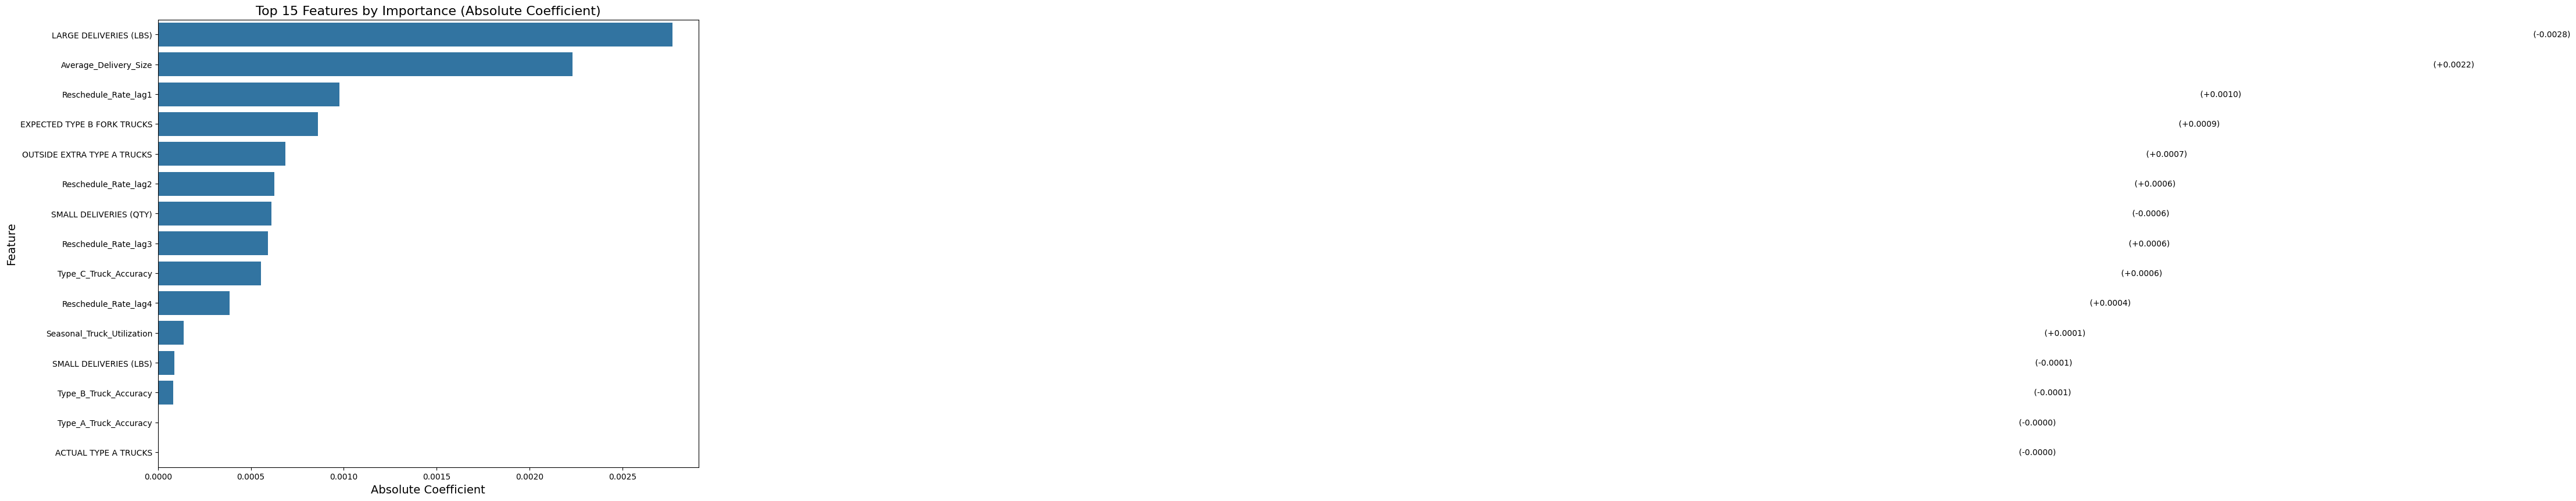

C:\Users\rding\AppData\Local\Temp\ipykernel_45348\3264361804.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coefficient', y='Feature', data=top_features, palette=colors)


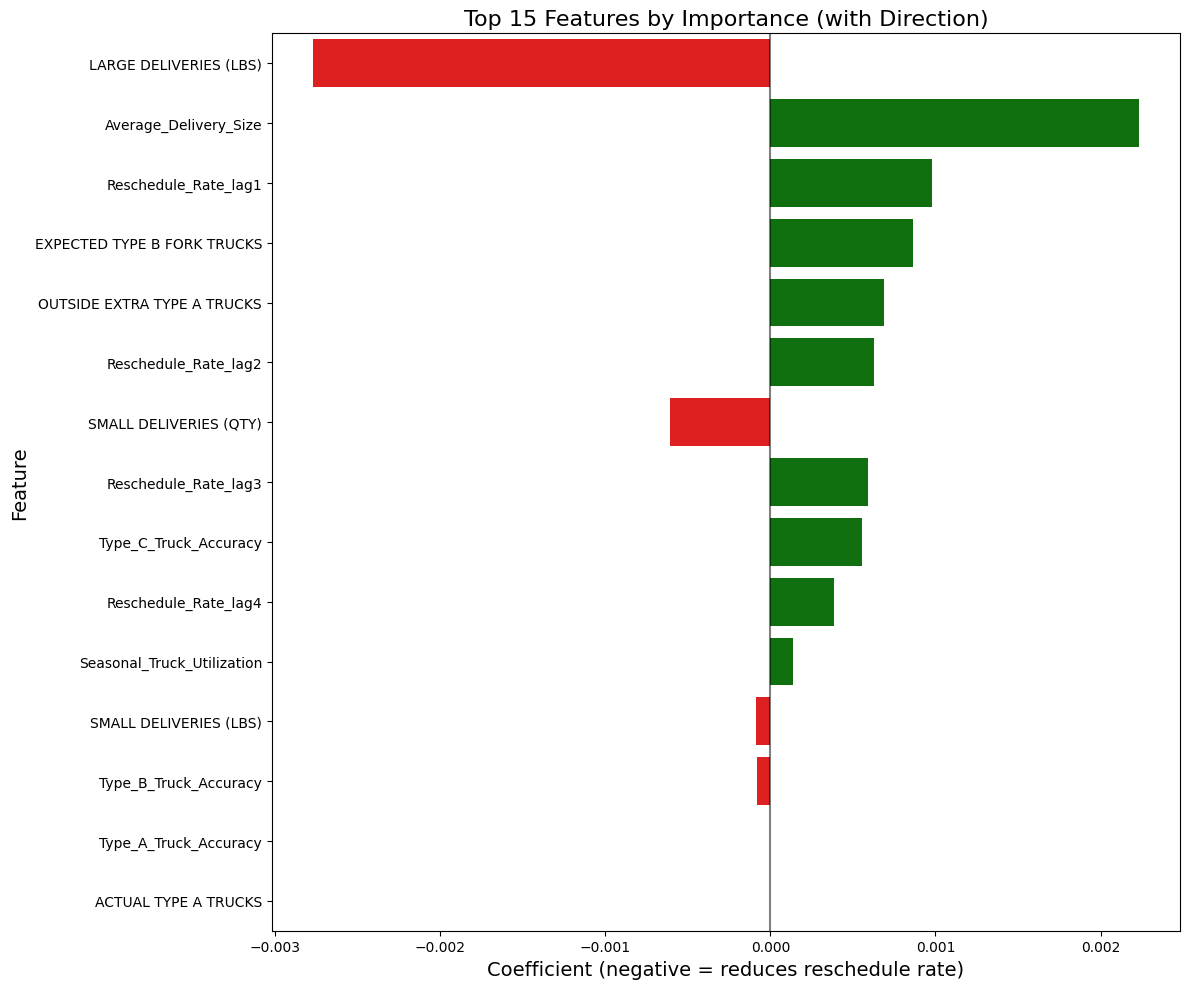

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_model already has the differenced variables and lag features
# and NaN values have been dropped

# 1. Define target and features
y = df_model['Reschedule_Rate']

X = df_model.drop(columns=['Reschedule_Rate', 'Delivery_Fulfillment_Rate', 
                           'Weight_Adjusted_Reschedule_Impact', 
                             'Residual_Reschedule_Rate', 'Trend_Reschedule_Rate',
                             'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'DFF', 'ACTUAL TYPE C TRUCKS', 'GASREGW', 'WPU081', 'EXPECTED TYPE C TRUCKS', 'Seasonal_Reschedule_Rate',])

# 2. Scale the features (important for regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 3. Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# 4. Train ElasticNetCV with time series cross-validation
# l1_ratio=0.5 is a starting point (0=Ridge, 1=Lasso)
elastic_net = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
    alphas=np.logspace(-5, 1, 50),
    cv=tscv,
    max_iter=10000,
    random_state=42
)

# Fit the model
elastic_net.fit(X_scaled, y)

# 5. Extract feature importances (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elastic_net.coef_
})

# Sort by absolute coefficient value to see most important features
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# 6. Print model information
print(f"Best alpha: {elastic_net.alpha_}")
print(f"Best l1_ratio: {elastic_net.l1_ratio_}")
print(f"R² score: {elastic_net.score(X_scaled, y)}")
print("\nTop 10 important features:")
print(feature_importance.head(10))

# 7. Visualize feature importance
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(15)  # Show top 15 features
ax = sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features)
ax.set_title('Top 15 Features by Importance (Absolute Coefficient)', fontsize=16)
ax.set_xlabel('Absolute Coefficient', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Add actual coefficient values as text
for i, v in enumerate(top_features['Abs_Coefficient']):
    actual_coef = top_features['Coefficient'].iloc[i]
    sign = '+' if actual_coef > 0 else '-'
    ax.text(v + 0.01, i, f" ({sign}{abs(actual_coef):.4f})", va='center')

plt.tight_layout()
plt.show()

# 8. Create a more detailed visualization showing coefficient signs
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(15)

# Use coefficient with sign for this plot
colors = ['red' if c < 0 else 'green' for c in top_features['Coefficient']]
ax = sns.barplot(x='Coefficient', y='Feature', data=top_features, palette=colors)
ax.set_title('Top 15 Features by Importance (with Direction)', fontsize=16)
ax.set_xlabel('Coefficient (negative = reduces reschedule rate)', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
Post_Model_Cols = ['LARGE DELIVERIES (QTY)', 'Average_Delivery_Size']
for col_name in Differenced_Col:
    ut.run_stationarity_tests(df[col_name], col_name)